In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def placeCharges(l,N,qTot,):
    # this function discretized a square sheet of charges of side l
    # and total charge Q. N charges per side are used. total charges is N**2
    x=np.linspace(-l/2+l/2/N,l/2-l/2/N,N)
    xx,yy=np.meshgrid(x,x)
    return(xx,yy,qTot/N**2)

In [62]:
xx,yy,q=placeCharges(10,100,1)

(-5.0, 5.0, -5.0, 5.0)

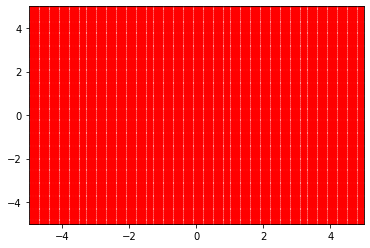

In [63]:
plt.plot(xx,yy,'r.')
plt.axis([-5,5,-5,5])

In [64]:
def potential(x,y,z,xx,yy,q):
    # (x,y,z) is the position at which the potential is calculated, xx and yy are the positions 
    # at which the minicharges q are.
    dist=np.sqrt((x-xx)**2+(y-yy)**2+z**2)
    return(q*np.sum(1/dist))

In [65]:
x=np.arange(-10,10,.1)
y=x*0 ; vx=x*0 ; vz=x*0
for i in range(x.size): vx[i]=potential(x[i],y[i],0,xx,yy,q)
for i in range(x.size): vz[i]=potential(0,0,x[i],xx,yy,q)

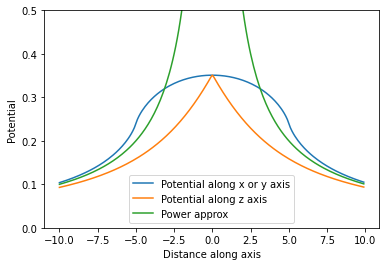

In [66]:
plt.plot(x,vx,label='Potential along x or y axis')
plt.plot(x,vz,label='Potential along z axis')
plt.plot(x,1/np.abs(x),label='Power approx')
plt.ylim([0,.5])
plt.xlabel('Distance along axis')
plt.ylabel('Potential')
plt.legend()

In [67]:
x=np.arange(-10,10,.1)
xmesh,ymesh=np.meshgrid(x,x)
v=xmesh*0
for i in range(x.size): 
    for j in range(x.size): v[i,j]=potential(xmesh[i,j],ymesh[i,j],0,xx,yy,q)
print(v.shape)

(200, 200)


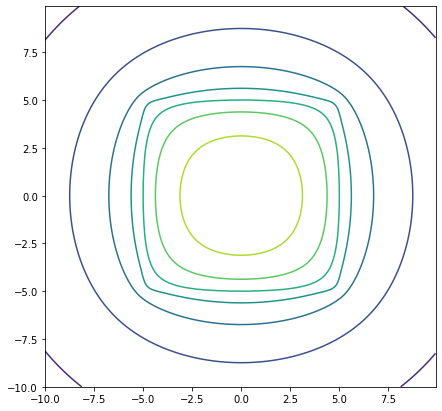

In [68]:
plt.figure(2,figsize=[7,7])
plt.contour(x,x,v)

In [69]:
def eField(x,y,xx,yy,q):
    eX=x*0 ; eY=x*0
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            dist=np.sqrt((x-xx[i,j])**2+(y-yy[i,j])**2)
            eX=eX+q/dist**3*(x-xx[i,j])
            eY=eY+q/dist**3*(y-yy[i,j])
    return(eX,eY)

In [70]:
eX1,eY1=eField(5,1,xx,yy,q)

In [71]:
dx=.0001
eX=(potential(5,1,0,xx,yy,q)-potential(5+dx,1,0,xx,yy,q))/dx
eY=(potential(5,1,0,xx,yy,q)-potential(5,1+dx,0,xx,yy,q))/dx
print((eX-eX1)/(eX+eX1)*.5,(eY-eY1)/(eY+eY1)/2)

-4.548555435595773e-05 -0.001411368067983796
